In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, RidgeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor, StackingRegressor, StackingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import make_scorer
from sklearn.base import RegressorMixin, ClassifierMixin, BaseEstimator
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split



from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor


### Data Collection

In [85]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module6/exercise/module6_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module6/exercise/module6_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module6_exercise_train.csv')
download_file(test_data_url, 'module6_exercise_test.csv')

Downloaded module6_exercise_train.csv from https://www.raphaelcousin.com/modules/module6/exercise/module6_exercise_train.csv
Downloaded module6_exercise_test.csv from https://www.raphaelcousin.com/modules/module6/exercise/module6_exercise_test.csv


In [86]:
data_train = pd.read_csv('module6_exercise_train.csv', index_col='index')
data_test = pd.read_csv('module6_exercise_test.csv', index_col='index')

### Data Analysis

In [87]:
data_train

,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00,end_of_day_return
index,,,,,,,,,,,,,,,,,,,
0,-3.345378,0.471913,0.111795,0.897695,-1.836632,0.853765,-1.169854,-0.515758,-0.672838,0.737822,-0.110476,0.120739,0.658008,-0.033507,-0.809134,-0.286582,-0.431717,-0.094759,-0.741115
1,0.325809,0.367349,-0.048372,-1.513650,0.355659,-3.117421,-0.881352,-0.007122,0.243771,0.016151,0.114610,-0.604529,0.148780,-0.229934,-0.506916,-0.604501,-0.348392,0.318222,1.174188
2,1.105315,1.767107,0.053923,0.001599,1.120131,-0.358522,-1.279510,-0.229908,0.918732,0.486627,0.143440,0.201272,-0.166683,-0.701750,-0.431819,-0.418378,0.645661,0.389446,-1.583453
3,-0.139515,0.400993,1.376735,0.248226,0.896831,-0.064874,-0.546736,-0.596431,-0.261391,0.233740,-0.242694,-0.713535,-0.331204,0.165809,-0.330894,0.883535,0.907813,-0.191447,1.614671
4,6.826520,2.643832,-0.686910,-0.175818,0.418767,-0.550301,-0.002805,-0.272078,0.798230,-0.481628,0.281879,0.762998,2.641929,-2.324375,-0.402507,0.155151,-0.467507,-0.596658,1.183321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.883029,0.062304,-0.297792,-0.512609,0.147675,0.128645,-0.722808,-0.112308,0.086121,-0.313414,0.407098,0.335073,0.681523,-0.380009,0.926100,-0.608350,0.619678,-0.334050,0.649858
3996,0.688887,-0.667074,0.346701,1.195935,-0.084245,0.007249,0.603659,-0.457421,0.383087,-0.004021,0.564976,0.397662,0.127530,0.412853,-0.078965,-0.017075,-0.219030,0.010699,0.487709
3997,0.246288,0.175187,0.463585,0.134366,-0.500703,1.491530,0.637691,0.048974,-0.218061,0.322912,-0.215735,-1.183474,-0.444753,0.468896,0.337624,0.367041,-0.318075,0.696240,0.111035


In [88]:
data_test

,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00
index,,,,,,,,,,,,,,,,,,
9000,-0.090754,-1.786981,-0.470490,0.545190,1.048661,2.133359,0.769342,0.829361,0.329543,-0.260203,0.557235,0.052095,-0.083066,-0.910045,-0.956864,0.058267,-0.406571,-0.647216
9001,7.611001,0.247861,-2.001656,-0.804107,-0.473829,1.259438,0.195555,0.101885,-1.077060,0.573665,-0.434945,-0.183208,0.463489,-0.559725,0.091081,-0.084349,0.096026,0.091618
9002,1.150194,0.091151,2.545506,0.775302,-1.025222,-0.894295,-0.440365,0.671856,0.428863,0.485069,-0.782287,-0.352444,0.257920,0.526284,-0.029759,-0.797493,0.743176,-0.220204
9003,-0.884874,-1.103034,0.755916,-0.412053,0.178287,-0.104350,-0.212248,0.081726,0.380151,0.005660,-0.501693,0.817424,-0.470671,0.140688,1.406956,1.754916,0.261623,-0.495981
9004,-0.589833,0.379596,-0.545424,-0.217812,-0.730794,-0.480085,0.470663,1.298896,-0.710654,0.867138,1.515816,0.197528,0.756792,0.090558,-0.819575,0.136961,0.023876,-0.451478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.170209,-0.057276,-0.822165,-1.232996,-1.187110,0.179970,0.212011,-0.802815,-1.420647,1.098860,0.010170,-0.776480,-0.428853,-1.547797,-0.111830,0.130183,-1.493579,-0.862974
9996,0.527195,-1.883375,-1.468747,-0.749872,-0.541944,1.093662,-1.257120,-2.523593,-1.534209,0.226028,0.215094,0.414398,1.123071,-1.157484,0.673495,-0.318814,0.856825,0.579775
9997,0.342242,-1.807571,0.777167,-0.825105,0.058622,-1.090268,0.338895,0.130677,-0.234081,0.270528,-0.837228,-0.364189,0.379240,0.127673,-1.070985,0.662475,-0.409687,-0.223988


In [89]:
data_train.describe()

,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00,end_of_day_return
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.141680,0.034964,0.020505,0.010436,-0.020574,0.002945,-0.010331,0.018534,0.005757,-0.016174,0.003401,-0.007827,0.009027,-0.021716,-0.018219,-0.019692,-0.012845,-0.005857,0.019466
std,5.257948,2.723808,1.352428,1.193797,1.066787,1.028344,0.980049,0.916572,0.793494,0.842957,0.748935,0.755444,0.742869,0.810765,0.743790,0.739733,0.735295,0.638472,0.962818
min,-153.020090,-14.173563,-11.462649,-8.014786,-6.884508,-6.174871,-7.197151,-12.981744,-5.170963,-10.867723,-5.270753,-6.466934,-3.780217,-7.522321,-3.853110,-4.318858,-6.421411,-3.553236,-8.210463
25%,-1.659958,-0.913043,-0.720355,-0.689361,-0.626834,-0.576174,-0.532172,-0.469984,-0.459903,-0.459817,-0.393010,-0.429838,-0.413955,-0.441057,-0.438892,-0.435665,-0.404864,-0.357411,-0.502152
50%,0.024667,-0.002644,0.008267,0.003442,-0.003890,-0.011194,-0.017745,0.014596,-0.010351,-0.034659,0.000475,-0.017674,0.004193,-0.015532,-0.030075,-0.031709,-0.007807,-0.004821,0.012860
75%,1.613584,0.925147,0.743400,0.680686,0.578904,0.582196,0.522556,0.492078,0.442551,0.413838,0.411547,0.397960,0.419423,0.412761,0.377625,0.391245,0.386953,0.342684,0.538451
max,42.788716,134.323450,10.271912,8.297362,12.070118,13.097849,10.406605,6.349618,4.765165,8.785591,7.543055,7.598514,5.996648,5.198389,6.403935,5.934699,5.290835,4.716630,11.468784


In [90]:
data_train.isnull().sum()

09_30_00             0
09_50_00             0
10_10_00             0
10_30_00             0
10_50_00             0
11_10_00             0
11_30_00             0
11_50_00             0
12_10_00             0
12_30_00             0
12_50_00             0
13_10_00             0
13_30_00             0
13_50_00             0
14_10_00             0
14_30_00             0
14_50_00             0
15_10_00             0
end_of_day_return    0
dtype: int64

In [91]:
data_test.isnull().sum()

09_30_00    0
09_50_00    0
10_10_00    0
10_30_00    0
10_50_00    0
11_10_00    0
11_30_00    0
11_50_00    0
12_10_00    0
12_30_00    0
12_50_00    0
13_10_00    0
13_30_00    0
13_50_00    0
14_10_00    0
14_30_00    0
14_50_00    0
15_10_00    0
dtype: int64

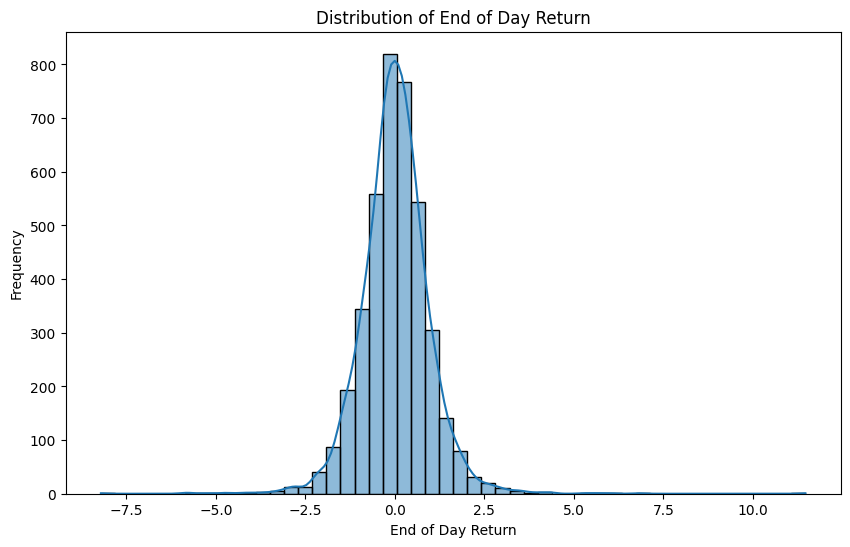

In [92]:
# Plot the distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data_train['end_of_day_return'], bins=50, kde=True)
plt.title('Distribution of End of Day Return')
plt.xlabel('End of Day Return')
plt.ylabel('Frequency')
plt.show()

### Model Building and Evaluate

In [93]:
y = data_train.pop('end_of_day_return')
X = data_train.copy()

In [94]:
def weighted_accuracy(y_true, y_pred):
    weights = np.abs(y_true)
    
    # Compute the sign of true and predicted values
    sign_true = np.sign(y_true)
    sign_pred = np.sign(y_pred)
    
    # Correct predictions where the sign of the true and predicted values match
    correct_predictions = sign_true == sign_pred
    
    # Compute the weighted accuracy
    weighted_acc = np.sum(weights * correct_predictions) / np.sum(weights)
    
    return weighted_acc

In [95]:
# Function to plot the evaluation results
def plot_results(mse_train, mse_test, w_acc_train, w_acc_test):
    plt.figure(figsize=(12, 6))

    # MSE plot
    plt.subplot(1, 2, 1)
    plt.plot(mse_train, label="Train MSE", marker='o')
    plt.plot(mse_test, label="Test MSE", marker='o')
    plt.fill_between(range(len(mse_train)), np.min(mse_train), np.max(mse_train), color='blue', alpha=0.1)
    plt.fill_between(range(len(mse_test)), np.min(mse_test), np.max(mse_test), color='orange', alpha=0.1)
    plt.title("MSE over Folds")
    plt.xlabel("Fold")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)

    # weighted_accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(w_acc_train, label="Train weighted_accuracy", marker='o')
    plt.plot(w_acc_test, label="Test weighted_accuracy", marker='o')
    plt.fill_between(range(len(w_acc_train)), np.min(w_acc_train), np.max(w_acc_train), color='blue', alpha=0.1)
    plt.fill_between(range(len(w_acc_test)), np.min(w_acc_test), np.max(w_acc_test), color='orange', alpha=0.1)
    plt.title("weighted_accuracy over Folds")
    plt.xlabel("Fold")
    plt.ylabel("weighted_accuracy")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_multi_model_results(results):
    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
    
    # Colors for train and test
    train_color = 'skyblue'
    test_color = 'lightgreen'
    
    # Plot MSE
    ax1.set_title('Mean Squared Error (MSE) Comparison', fontsize=16)
    ax1.set_ylabel('MSE', fontsize=12)
    ax1.set_xlabel('Models', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot weighted_accuracy
    ax2.set_title('weighted_accuracy Comparison', fontsize=16)
    ax2.set_ylabel('weighted_accuracy', fontsize=12)
    ax2.set_xlabel('Models', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    x = np.arange(len(results))
    width = 0.35
    
    for i, (model_name, scores) in enumerate(results.items()):
        # MSE
        mse_train = scores['mse_train']
        mse_test = scores['mse_test']
        
        ax1.bar(x[i] - width/2, np.mean(mse_train), width, label='Train' if i == 0 else "", 
                color=train_color, alpha=0.7)
        ax1.bar(x[i] + width/2, np.mean(mse_test), width, label='Test' if i == 0 else "", 
                color=test_color, alpha=0.7)
        
        ax1.errorbar(x[i] - width/2, np.mean(mse_train), 
                     yerr=[[np.mean(mse_train)-np.min(mse_train)], [np.max(mse_train)-np.mean(mse_train)]], 
                     fmt='none', ecolor='black', capsize=5)
        ax1.errorbar(x[i] + width/2, np.mean(mse_test), 
                     yerr=[[np.mean(mse_test)-np.min(mse_test)], [np.max(mse_test)-np.mean(mse_test)]], 
                     fmt='none', ecolor='black', capsize=5)
        
        # weighted_accuracy
        w_acc_train = scores['w_acc_train']
        w_acc_test = scores['w_acc_test']
        
        ax2.bar(x[i] - width/2, np.mean(w_acc_train), width, label='Train' if i == 0 else "", 
                color=train_color, alpha=0.7)
        ax2.bar(x[i] + width/2, np.mean(w_acc_test), width, label='Test' if i == 0 else "", 
                color=test_color, alpha=0.7)
        
        ax2.errorbar(x[i] - width/2, np.mean(w_acc_train), 
                     yerr=[[np.mean(w_acc_train)-np.min(w_acc_train)], [np.max(w_acc_train)-np.mean(w_acc_train)]], 
                     fmt='none', ecolor='black', capsize=5)
        ax2.errorbar(x[i] + width/2, np.mean(w_acc_test), 
                     yerr=[[np.mean(w_acc_test)-np.min(w_acc_test)], [np.max(w_acc_test)-np.mean(w_acc_test)]], 
                     fmt='none', ecolor='black', capsize=5)
    
    ax1.set_xticks(x)
    ax1.set_xticklabels(results.keys(), rotation=45, ha='right')
    ax2.set_xticks(x)
    ax2.set_xticklabels(results.keys(), rotation=45, ha='right')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

#### Simple Baseline

In [96]:
# Function to handle train-test evaluation in a fold
def train_and_evaluate(X_train, X_test, y_train, y_test, model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train set
    y_pred_train = model.predict(X_train)
    # Make predictions on train set
    y_pred_test = model.predict(X_test)
    
    # Compute MSE for train and test
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Compute weighted_accuracy
    
    w_acc_train = weighted_accuracy(y_train, y_pred_train)
    w_acc_test = weighted_accuracy(y_test, y_pred_test)
    
    return mse_train, mse_test, w_acc_train, w_acc_test


def run_multi_model_cv(X, y, models, n_splits=5):
    fold = KFold(n_splits=n_splits)
    results = {name: {'mse_train': [], 'mse_test': [], 'w_acc_train': [], 'w_acc_test': []} 
               for name in models.keys()}
    
    for train_index, test_index in fold.split(X, y):
        X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
        y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
        
        for name, model in models.items():
            mse_train, mse_test, w_acc_train, w_acc_test = train_and_evaluate(
                X_train, X_test, y_train, y_test, model
            )
            results[name]['mse_train'].append(mse_train)
            results[name]['mse_test'].append(mse_test)
            results[name]['w_acc_train'].append(w_acc_train)
            results[name]['w_acc_test'].append(w_acc_test)
        # Find the model with the best mean w_acc test score
    best_mean_w_acc = -1
    best_model = None
    best_min_w_acc = None
    best_max_w_acc = None
    
    for name, result in results.items():
        w_acc_test_scores = result['w_acc_test']
        mean_w_acc_test = sum(w_acc_test_scores) / len(w_acc_test_scores)  # Calculate mean w_acc score
        min_w_acc_test = min(w_acc_test_scores)  # Minimum w_acc score
        max_w_acc_test = max(w_acc_test_scores)  # Maximum w_acc score
        
        if mean_w_acc_test > best_mean_w_acc:
            best_mean_w_acc = mean_w_acc_test
            best_min_w_acc = min_w_acc_test
            best_max_w_acc = max_w_acc_test
            best_model = name
    
    # Print the best mean w_acc test score, min, max, and the associated model
    print(f"Best mean w_acc test score: {best_mean_w_acc:.4f} by model: {best_model}")
    print(f"Min w_acc test score: {best_min_w_acc:.4f}, Max w_acc test score: {best_max_w_acc:.4f}")
    return results


In [97]:
# Step 1: Run cross-validation
results = run_multi_model_cv(X, y, {"RandomForestRegressor": RandomForestRegressor(n_jobs=-1)})

Best mean w_acc test score: 0.5244 by model: RandomForestRegressor
Min w_acc test score: 0.4998, Max w_acc test score: 0.5477


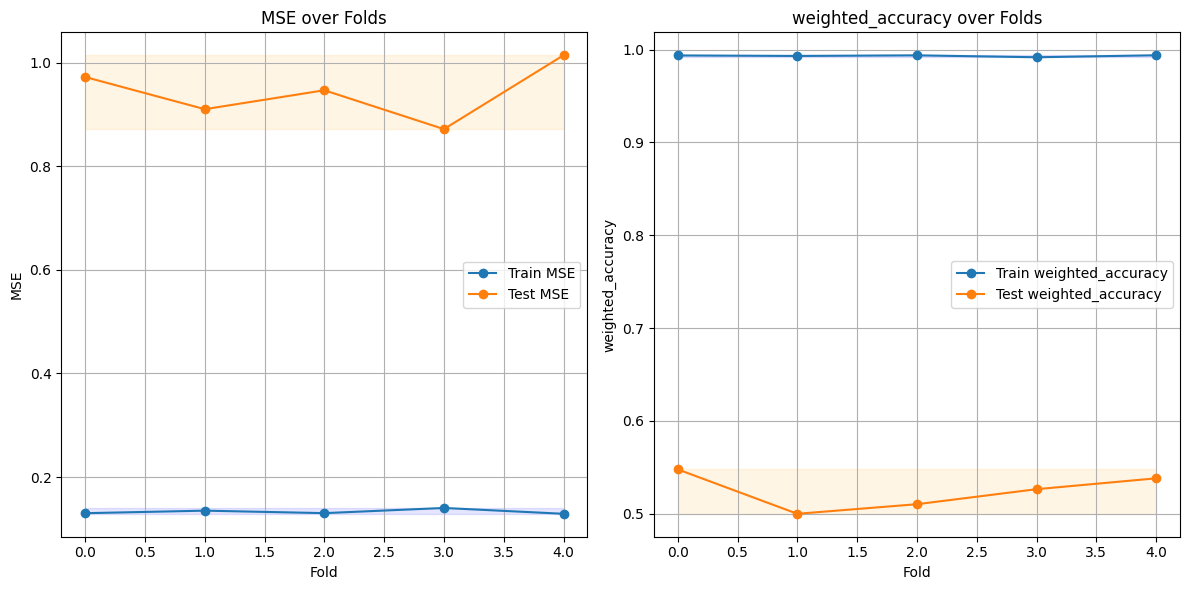

In [98]:
# Step 2: Plot the results
plot_results(results["RandomForestRegressor"]["mse_train"],
             results["RandomForestRegressor"]["mse_test"],
             results["RandomForestRegressor"]["w_acc_train"],
             results["RandomForestRegressor"]["w_acc_test"])

In [99]:
models = {
    'Ridge': Ridge(),
    'Decision Tree Regressor': RandomForestRegressor(n_jobs=-1)
    }

In [100]:
# Run cross-validation for regression models
results = run_multi_model_cv(X, y, models)

Best mean w_acc test score: 0.5254 by model: Ridge
Min w_acc test score: 0.4869, Max w_acc test score: 0.5544


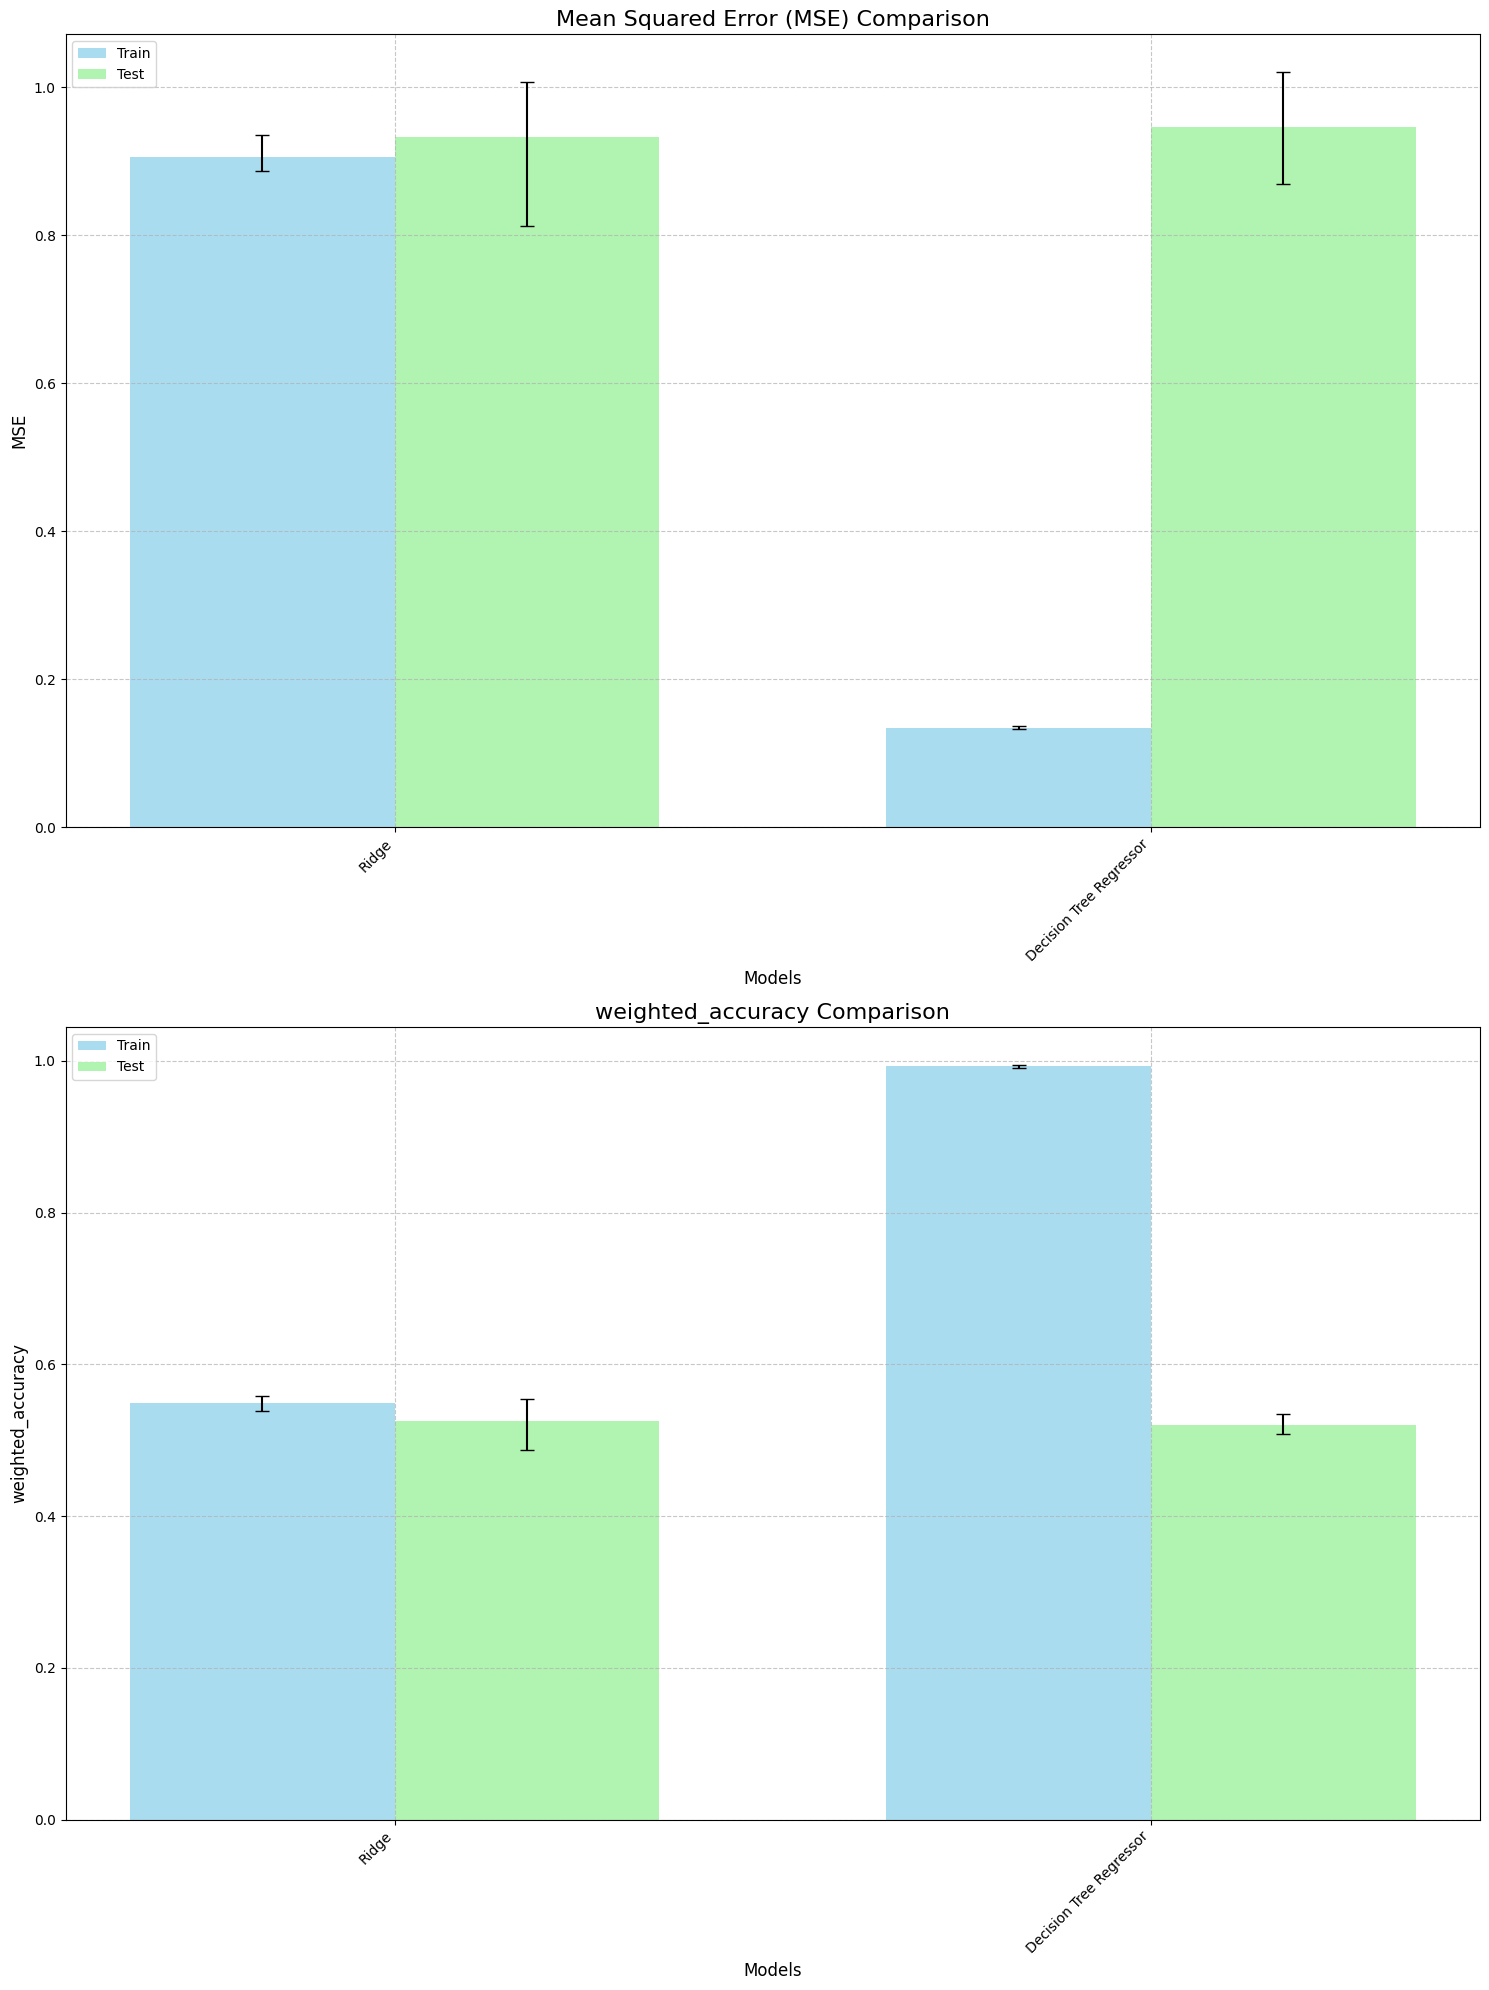

In [101]:
# Plot MSE results for regression models
plot_multi_model_results(results)

#### Manage properly the objective weighted_accuracy
should we create different classes? custom loss?

Create Compare and Optimize different models

##### Compare Different models

In [102]:
models = {
    'Ridge': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'SVR': SVR(),
    'Lasso': Lasso(max_iter=5000),
    'KNN Regressor': KNeighborsRegressor(),
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(verbose=-1)
}

In [67]:
results_more = run_multi_model_cv(X, y, models)

Best mean w_acc test score: 0.5254 by model: Ridge
Min w_acc test score: 0.4869, Max w_acc test score: 0.5544


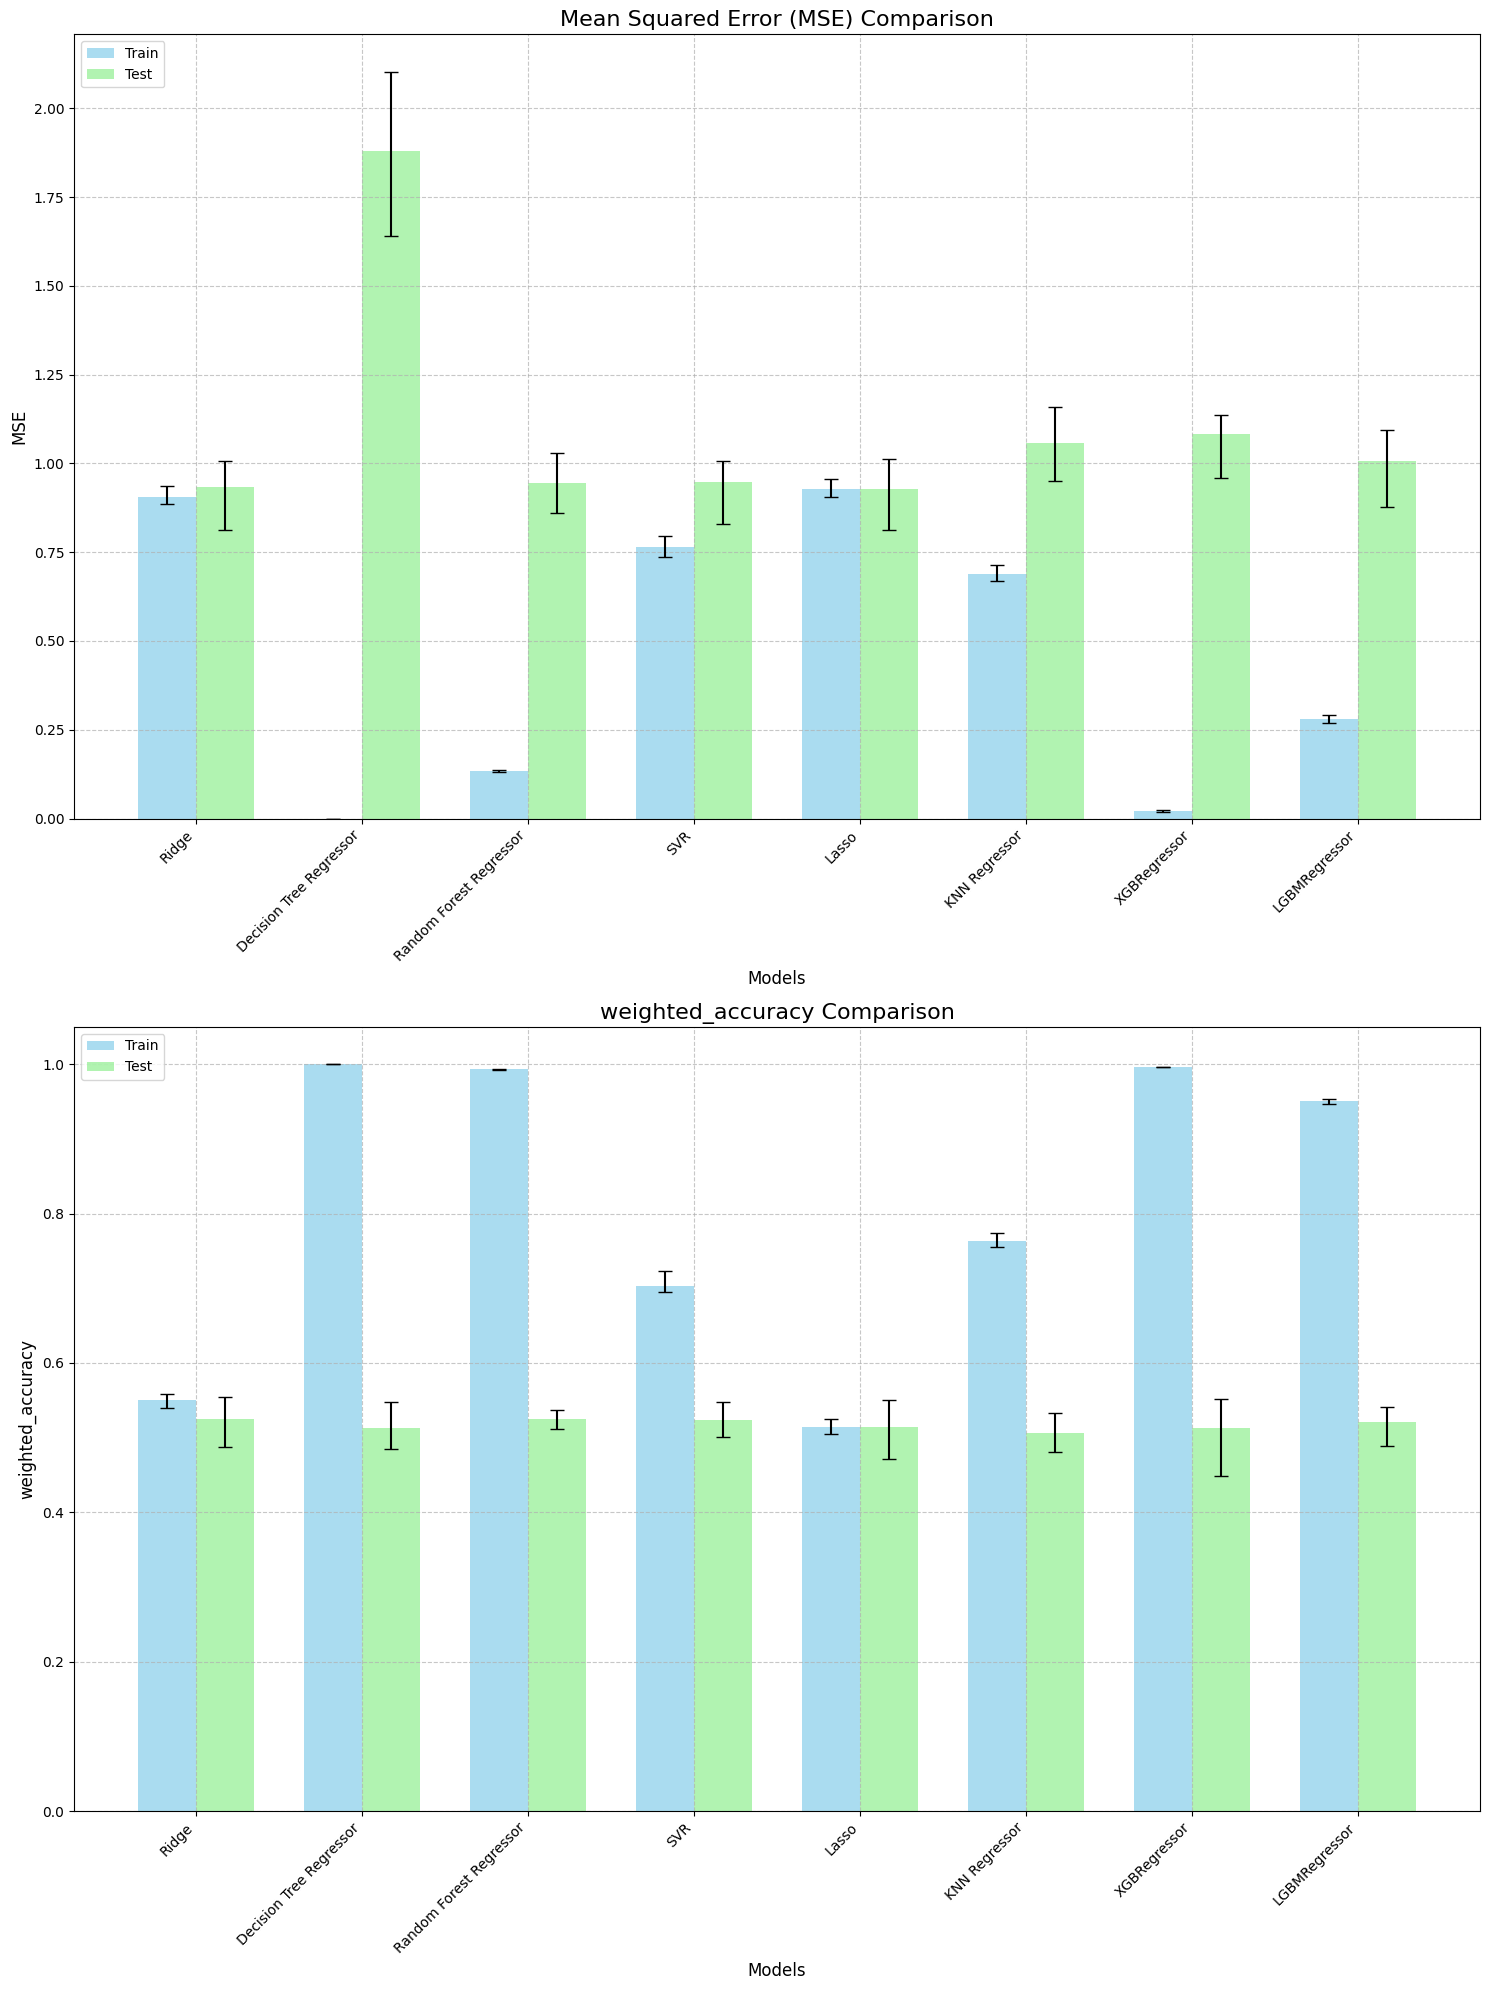

In [68]:
plot_multi_model_results(results_more)

##### Optimize Different models

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from skopt.callbacks import DeltaYStopper

# Define the search spaces for each model
spaces = {
    'RandomForestRegressor': {
        'n_estimators': Integer(10, 500),
        'max_depth': Integer(1, 50),
        'min_samples_split': Integer(2, 20),
        'min_samples_leaf': Integer(1, 20)
    },
    'XGBRegressor': {
        'n_estimators': Integer(10, 200),
        'max_depth': Integer(1, 50),
        'learning_rate': Real(0.01, 2.0, 'log-uniform'),
        'subsample': Real(0.5, 1.0, 'uniform'),
        'colsample_bytree': Real(0.5, 1.0, 'uniform')
    },
    'LGBMRegressor': {
        'n_estimators': Integer(10, 200),
        'max_depth': Integer(1, 50),
        'learning_rate': Real(0.01, 1.0, 'log-uniform'),
        'num_leaves': Integer(20, 300),
        'min_child_samples': Integer(1, 100)
    },
    'SVR': {
        'C': Real(0.1, 10.0, 'log-uniform'),
        'epsilon': Real(0.001, 1.0, 'log-uniform'),
        'kernel': Categorical(['linear', 'rbf', 'poly'])
    },
    'KNNRegressor': {
        'n_neighbors': Integer(1, 50),
        'weights': Categorical(['uniform', 'distance']),
        'p': Integer(1, 2)
    },
    'Lasso': {
        'alpha': Real(0.0001, 10.0, 'log-uniform')
    },
    'Ridge': {
        'alpha': Real(0.01, 10.0, 'log-uniform'),
    }
}

def optimizer_callback(res):
    if len(res.func_vals) % 5 == 0:  # Print every 5 iterations
        print(f"Iteration {len(res.func_vals)}: Best score = {-res.fun:.4f}")

delta_stopper = DeltaYStopper(delta=0.001, n_best=10)

# Function to optimize models
def optimize_model(X, y, model, space, n_iter=200):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    
    weighted_acc_scorer = make_scorer(weighted_accuracy, greater_is_better=True)
    
    opt = BayesSearchCV(
        model,
        space,
        n_iter=n_iter,
        n_points=5,
        cv=kfold,
        n_jobs=-1,
        scoring=weighted_acc_scorer,
        random_state=42
    )
    
    opt.fit(X, y, callback=[optimizer_callback, delta_stopper])
    
    return opt

# Optimize models
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(verbose=-1),
    'SVR': SVR(),
    'KNNRegressor': KNeighborsRegressor(),
    'Lasso': Lasso(max_iter=5000),
    'Ridge': Ridge(),
}

In [ ]:
# models_opt = {}
# for name, model in models.items():
#     print(f"Optimizing {name}...")
#     opt = optimize_model(X, y, model, spaces[name])
#     models_opt[name] = opt
#     print(f"Best parameters: {opt.best_params_}")
#     print(f"Best score: {opt.best_score_:.4f}")
#     print()

Optimizing Ridge...
Iteration 5: Best score = 0.5231
Iteration 10: Best score = 0.5231
Best parameters: OrderedDict({'alpha': 0.11671189044514778})
Best score: 0.5231

Optimizing Decision Tree Regressor...
Iteration 5: Best score = 0.5048
Iteration 10: Best score = 0.5054
Iteration 15: Best score = 0.5173
Iteration 20: Best score = 0.5173
Iteration 25: Best score = 0.5173
Iteration 30: Best score = 0.5173
Iteration 35: Best score = 0.5261
Iteration 40: Best score = 0.5261
Iteration 45: Best score = 0.5261
Iteration 50: Best score = 0.5269
Iteration 55: Best score = 0.5269
Iteration 60: Best score = 0.5269
Iteration 65: Best score = 0.5269
Iteration 70: Best score = 0.5269
Iteration 75: Best score = 0.5269
Iteration 80: Best score = 0.5269
Iteration 85: Best score = 0.5269
Iteration 90: Best score = 0.5269
Best parameters: OrderedDict({'max_depth': 46, 'min_samples_leaf': 10, 'min_samples_split': 20})
Best score: 0.5269

Optimizing Random Forest Regressor...
Iteration 5: Best score = 0.

d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 130: Best score = 0.5436
Iteration 135: Best score = 0.5436


d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 140: Best score = 0.5436


d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 145: Best score = 0.5436
Iteration 150: Best score = 0.5436
Iteration 155: Best score = 0.5436
Iteration 160: Best score = 0.5436
Iteration 165: Best score = 0.5436
Iteration 170: Best score = 0.5436
Iteration 175: Best score = 0.5436
Iteration 180: Best score = 0.5436
Iteration 185: Best score = 0.5436


d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 190: Best score = 0.5436
Iteration 195: Best score = 0.5436
Iteration 200: Best score = 0.5436
Best parameters: OrderedDict({'max_depth': 31, 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 331})
Best score: 0.5436

Optimizing SVR...
Iteration 5: Best score = 0.5362
Iteration 10: Best score = 0.5362
Iteration 15: Best score = 0.5362
Iteration 20: Best score = 0.5363
Iteration 25: Best score = 0.5363
Iteration 30: Best score = 0.5363
Iteration 35: Best score = 0.5365
Iteration 40: Best score = 0.5365
Iteration 45: Best score = 0.5365
Iteration 50: Best score = 0.5365
Iteration 55: Best score = 0.5365
Iteration 60: Best score = 0.5365
Iteration 65: Best score = 0.5369
Iteration 70: Best score = 0.5384
Iteration 75: Best score = 0.5384
Iteration 80: Best score = 0.5384
Iteration 85: Best score = 0.5384
Iteration 90: Best score = 0.5407
Iteration 95: Best score = 0.5407
Iteration 100: Best score = 0.5407
Iteration 105: Best score = 0.5407
Iteration 110: Best score

d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(11), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(1), 'uniform']
  warnings.warn(


Iteration 30: Best score = 0.5247
Iteration 35: Best score = 0.5247
Iteration 40: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(1), np.str_('uniform')] before, using random point [36, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(1), np.str_('uniform')] before, using random point [31, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [1, np.int64(1), 'uniform']
  warnings.warn(


Iteration 45: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(26), np.int64(1), np.str_('distance')] before, using random point [26, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(26), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(1), 'uniform']
  warnin

Iteration 50: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [46, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(11), np.int64(1), np.str_('distance')] before, using random point [46, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(11), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(2), 'uniform']
  warning

Iteration 55: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(31), np.int64(1), np.str_('uniform')] before, using random point [41, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [46, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [1, np.int64(2), 'uniform']
  warnings.wa

Iteration 60: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(46), np.int64(2), np.str_('distance')] before, using random point [36, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [26, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(1), np.str_('distance')] before, using random point [1, np.int64(2), 'uniform']
  warnings.w

Iteration 65: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(31), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(36), np.int64(2), np.str_('uniform')] before, using random point [46, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(1), 'uniform']
  warnings.war

Iteration 70: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(2), np.str_('distance')] before, using random point [6, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(46), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [21, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(1), 'distance']
  warnings.

Iteration 75: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(41), np.int64(2), np.str_('distance')] before, using random point [16, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [21, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(2), 'distance']
  warnings

Iteration 80: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(11), np.int64(1), np.str_('uniform')] before, using random point [16, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [21, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(1), 'distance']
  warnings.

Iteration 85: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('uniform')] before, using random point [31, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(2), 'uniform']
  warnings.w

Iteration 90: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(11), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [46, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(1), 'distance']
  warnings.

Iteration 95: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(1), np.int64(2), np.str_('distance')] before, using random point [11, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(46), np.int64(1), np.str_('distance')] before, using random point [1, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(1), 'distance']
  warnings.

Iteration 100: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(2), 'distance']
  warnings

Iteration 105: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(41), np.int64(2), np.str_('uniform')] before, using random point [1, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(2), 'distance']
  warnings.w

Iteration 110: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(2), np.str_('distance')] before, using random point [46, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [1, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(2), 'uniform']
  warnings.war

Iteration 115: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(41), np.int64(2), np.str_('uniform')] before, using random point [1, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(2), 'uniform']
  warnings.war

Iteration 120: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('uniform')] before, using random point [31, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [21, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(11), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(1), 'uniform']
  warnings.w

Iteration 125: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(31), np.int64(2), np.str_('distance')] before, using random point [11, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(1), np.str_('distance')] before, using random point [46, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [1, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(1), 'uniform']
  warnings.

Iteration 130: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(41), np.int64(2), np.str_('uniform')] before, using random point [11, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(1), 'distance']
  warnings

Iteration 135: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(46), np.int64(1), np.str_('uniform')] before, using random point [31, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [26, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(2), 'distance']
  warnings.

Iteration 140: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(1), 'uniform']
  warnings.w

Iteration 145: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [26, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [46, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(2), 'uniform']
  warnings.wa

Iteration 150: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(11), np.int64(1), np.str_('uniform')] before, using random point [11, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [1, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [21, np.int64(1), 'distance']
  warnings.

Iteration 155: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [21, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('uniform')] before, using random point [46, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(2), 'uniform']
  warnings.war

Iteration 160: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(1), np.int64(2), np.str_('uniform')] before, using random point [21, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [21, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [21, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(1), 'uniform']
  warnings.

Iteration 165: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [1, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(2), 'distance']
  warnings.wa

Iteration 170: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(41), np.int64(2), np.str_('uniform')] before, using random point [1, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(2), 'uniform']
  warnings.w

Iteration 175: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(2), np.str_('distance')] before, using random point [16, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [26, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [46, np.int64(2), 'uniform']
  warnings

Iteration 180: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(26), np.int64(1), np.str_('uniform')] before, using random point [6, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(11), np.int64(2), np.str_('uniform')] before, using random point [31, np.int64(2), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [16, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(2), 'uniform']
  warnings.wa

Iteration 185: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [11, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(26), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(2), 'distance']
  warnings.w

Iteration 190: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [41, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [46, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [21, np.int64(1), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [6, np.int64(1), 'uniform']
  warnings.wa

Iteration 195: Best score = 0.5247


d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(36), np.int64(1), np.str_('distance')] before, using random point [26, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [31, np.int64(1), 'uniform']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [46, np.int64(2), 'distance']
  warnings.warn(
d:\Anaconda3\envs\stat\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6), np.int64(1), np.str_('distance')] before, using random point [36, np.int64(1), 'distance']
  warnings

Iteration 200: Best score = 0.5247
Best parameters: OrderedDict({'n_neighbors': 6, 'p': 1, 'weights': 'distance'})
Best score: 0.5247

Optimizing XGBRegressor...
Iteration 5: Best score = 0.5244
Iteration 10: Best score = 0.5291
Iteration 15: Best score = 0.5291
Iteration 20: Best score = 0.5318
Iteration 25: Best score = 0.5318
Iteration 30: Best score = 0.5361
Iteration 35: Best score = 0.5361
Iteration 40: Best score = 0.5361
Iteration 45: Best score = 0.5361
Iteration 50: Best score = 0.5361
Iteration 55: Best score = 0.5361
Iteration 60: Best score = 0.5361
Iteration 65: Best score = 0.5361
Iteration 70: Best score = 0.5361
Iteration 75: Best score = 0.5361
Iteration 80: Best score = 0.5361
Iteration 85: Best score = 0.5361
Iteration 90: Best score = 0.5361
Iteration 95: Best score = 0.5361
Iteration 100: Best score = 0.5361
Iteration 105: Best score = 0.5361
Iteration 110: Best score = 0.5361
Iteration 115: Best score = 0.5361
Iteration 120: Best score = 0.5361
Iteration 125: Bes

d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 145: Best score = 0.5361
Iteration 150: Best score = 0.5361
Iteration 155: Best score = 0.5361
Iteration 160: Best score = 0.5361
Iteration 165: Best score = 0.5361
Iteration 170: Best score = 0.5361
Iteration 175: Best score = 0.5361
Iteration 180: Best score = 0.5361
Iteration 185: Best score = 0.5361


d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 190: Best score = 0.5361
Iteration 195: Best score = 0.5361
Iteration 200: Best score = 0.5361
Best parameters: OrderedDict({'colsample_bytree': 0.9019695899674767, 'learning_rate': 0.011089905313273245, 'max_depth': 46, 'n_estimators': 85, 'subsample': 0.601155526967877})
Best score: 0.5361

Optimizing LGBMRegressor...
Iteration 5: Best score = 0.5191
Iteration 10: Best score = 0.5390
Iteration 15: Best score = 0.5390
Iteration 20: Best score = 0.5390
Iteration 25: Best score = 0.5390
Iteration 30: Best score = 0.5390
Iteration 35: Best score = 0.5390
Iteration 40: Best score = 0.5390
Iteration 45: Best score = 0.5390
Iteration 50: Best score = 0.5390
Iteration 55: Best score = 0.5390
Iteration 60: Best score = 0.5390
Iteration 65: Best score = 0.5390
Iteration 70: Best score = 0.5401
Iteration 75: Best score = 0.5401
Iteration 80: Best score = 0.5401
Iteration 85: Best score = 0.5401
Iteration 90: Best score = 0.5401
Iteration 95: Best score = 0.5401
Iteration 100: Best sco

d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 135: Best score = 0.5416
Iteration 140: Best score = 0.5440


d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 145: Best score = 0.5477
Iteration 150: Best score = 0.5477
Iteration 155: Best score = 0.5477
Iteration 160: Best score = 0.5477
Iteration 165: Best score = 0.5477


d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 170: Best score = 0.5477
Iteration 175: Best score = 0.5477
Iteration 180: Best score = 0.5477
Iteration 185: Best score = 0.5477


d:\Anaconda3\envs\stat\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 190: Best score = 0.5477
Iteration 195: Best score = 0.5477
Iteration 200: Best score = 0.5477
Best parameters: OrderedDict({'bagging_fraction': 0.5, 'bagging_freq': 5, 'feature_fraction': 0.9108737450444597, 'lambda_l1': 1.0, 'lambda_l2': 4.017497975584288, 'learning_rate': 0.02152564016405013, 'max_depth': 4, 'min_child_samples': 65, 'min_child_weight': 0.02546111306128179, 'n_estimators': 80, 'num_leaves': 235})
Best score: 0.5477



In [ ]:
# Optimizing RandomForestRegressor...
# Iteration 5: Best score = 0.5258
# Iteration 10: Best score = 0.5258
# Iteration 15: Best score = 0.5269
# Iteration 20: Best score = 0.5321
# Iteration 25: Best score = 0.5376
# Iteration 30: Best score = 0.5376
# Iteration 35: Best score = 0.5376
# Iteration 40: Best score = 0.5376
# Iteration 45: Best score = 0.5376
# Iteration 50: Best score = 0.5376
# Iteration 55: Best score = 0.5376
# Iteration 60: Best score = 0.5376
# Iteration 65: Best score = 0.5376
# Iteration 70: Best score = 0.5376
# Iteration 75: Best score = 0.5376
# Iteration 80: Best score = 0.5376
# Best parameters: OrderedDict({'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 86})
# Best score: 0.5376

# Optimizing XGBRegressor...
# Iteration 5: Best score = 0.5230
# Iteration 10: Best score = 0.5230
# Iteration 15: Best score = 0.5278
# Iteration 20: Best score = 0.5306
# Iteration 25: Best score = 0.5338
# Iteration 30: Best score = 0.5338
# Iteration 35: Best score = 0.5338
# Iteration 40: Best score = 0.5338
# Iteration 45: Best score = 0.5338
# Iteration 50: Best score = 0.5338
# Iteration 55: Best score = 0.5338
# Iteration 60: Best score = 0.5338
# Iteration 65: Best score = 0.5338
# Iteration 70: Best score = 0.5338
# Iteration 75: Best score = 0.5339
# Iteration 80: Best score = 0.5339
# Best parameters: OrderedDict({'colsample_bytree': 0.8346448781876539, 'learning_rate': 0.08809370912522944, 'max_depth': 37, 'n_estimators': 176, 'subsample': 0.7809583904032997})
# Best score: 0.5339

# Optimizing LGBMRegressor...
# Iteration 5: Best score = 0.5259
# Iteration 10: Best score = 0.5265
# Iteration 15: Best score = 0.5265
# Iteration 20: Best score = 0.5265
# Iteration 25: Best score = 0.5272
# Iteration 30: Best score = 0.5272
# Iteration 35: Best score = 0.5272
# Iteration 40: Best score = 0.5272
# Iteration 45: Best score = 0.5272
# Iteration 50: Best score = 0.5272
# Iteration 55: Best score = 0.5272
# Iteration 60: Best score = 0.5272
# Iteration 65: Best score = 0.5272
# Iteration 70: Best score = 0.5272
# Iteration 75: Best score = 0.5272
# Iteration 80: Best score = 0.5272
# Best parameters: OrderedDict({'learning_rate': 0.02767728625512209, 'max_depth': 6, 'min_child_samples': 95, 'n_estimators': 185, 'num_leaves': 139})
# Best score: 0.5272

# Optimizing SVR...
# Iteration 5: Best score = 0.5368
# Iteration 10: Best score = 0.5368
# Iteration 15: Best score = 0.5377
# Iteration 20: Best score = 0.5382
# Iteration 25: Best score = 0.5382
# Iteration 30: Best score = 0.5382
# Iteration 35: Best score = 0.5382
# Iteration 40: Best score = 0.5382
# Iteration 45: Best score = 0.5382
# Iteration 50: Best score = 0.5382
# Iteration 55: Best score = 0.5382
# Iteration 60: Best score = 0.5382
# Iteration 65: Best score = 0.5382
# Iteration 70: Best score = 0.5382
# Iteration 75: Best score = 0.5382
# Iteration 80: Best score = 0.5382
# Best parameters: OrderedDict({'C': 9.97811475103633, 'epsilon': 0.0013486889143963922, 'kernel': 'linear'})
# Best score: 0.5382

# Optimizing KNNRegressor...
# Iteration 5: Best score = 0.5194
# Iteration 10: Best score = 0.5251
# Iteration 15: Best score = 0.5251
# Iteration 20: Best score = 0.5251
# Iteration 25: Best score = 0.5251
# Iteration 30: Best score = 0.5251
# Iteration 35: Best score = 0.5251
# Iteration 40: Best score = 0.5251
# Iteration 45: Best score = 0.5251
# Iteration 50: Best score = 0.5251
# Iteration 55: Best score = 0.5261
# Iteration 60: Best score = 0.5261
# Iteration 65: Best score = 0.5261
# Iteration 70: Best score = 0.5261
# Iteration 75: Best score = 0.5261
# Iteration 80: Best score = 0.5272
# Best parameters: OrderedDict({'n_neighbors': 10, 'p': 1, 'weights': 'distance'})
# Best score: 0.5272

# Optimizing Lasso...
# Iteration 5: Best score = 0.5264
# Iteration 10: Best score = 0.5264
# Iteration 15: Best score = 0.5264
# Iteration 20: Best score = 0.5278
# Iteration 25: Best score = 0.5278
# Iteration 30: Best score = 0.5278
# Iteration 35: Best score = 0.5278
# Iteration 40: Best score = 0.5278
# Iteration 45: Best score = 0.5278
# Iteration 50: Best score = 0.5278
# Iteration 55: Best score = 0.5278
# Iteration 60: Best score = 0.5290
# Iteration 65: Best score = 0.5297
# Iteration 70: Best score = 0.5297
# Iteration 75: Best score = 0.5297
# Iteration 80: Best score = 0.5297
# Best parameters: OrderedDict({'alpha': 0.01584871006234778})
# Best score: 0.5297

# Optimizing Ridge...
# Iteration 5: Best score = 0.5256
# Iteration 10: Best score = 0.5256
# Best parameters: OrderedDict({'alpha': 6.2893244081003825})
# Best score: 0.5256

In [ ]:
models_opt_2 = {}

models_opt_2['RandomForestRegressor'] = {
    'estimator': RandomForestRegressor(**{'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 86}),
    'best_params_': {'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 86},
    'best_score_': 0.5376
}

models_opt_2['XGBRegressor'] = {
    'estimator': XGBRegressor(**{'colsample_bytree': 0.8346448781876539, 'learning_rate': 0.08809370912522944, 
                                 'max_depth': 37, 'n_estimators': 176, 'subsample': 0.7809583904032997}),
    'best_params_': {'colsample_bytree': 0.8346448781876539, 'learning_rate': 0.08809370912522944, 
                     'max_depth': 37, 'n_estimators': 176, 'subsample': 0.7809583904032997},
    'best_score_': 0.5339
}

models_opt_2['LGBMRegressor'] = {
    'estimator': LGBMRegressor(**{'verbose': -1, 'learning_rate': 0.02767728625512209, 'max_depth': 6, 
                                  'min_child_samples': 95, 'n_estimators': 185, 'num_leaves': 139}),
    'best_params_': {'verbose': -1, 'learning_rate': 0.02767728625512209, 'max_depth': 6, 'min_child_samples': 95, 'n_estimators': 185, 'num_leaves': 139},
    'best_score_': 0.5272
}

models_opt_2['SVR'] = {
    'estimator': SVR(**{'C': 9.97811475103633, 'epsilon': 0.0013486889143963922, 'kernel': 'linear'}),
    'best_params_': {'C': 9.97811475103633, 'epsilon': 0.0013486889143963922, 'kernel': 'linear'},
    'best_score_': 0.5382
}

models_opt_2['KNNRegressor'] = {
    'estimator': KNeighborsRegressor(**{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}),
    'best_params_': {'n_neighbors': 10, 'p': 1, 'weights': 'distance'},
    'best_score_': 0.5272
}

models_opt_2['Lasso'] = {
    'estimator': Lasso(**{'alpha': 0.01584871006234778, "max_iter": 5000}),
    'best_params_': {'alpha': 0.01584871006234778, "max_iter": 5000},
    'best_score_': 0.5297
}

models_opt_2['Ridge'] = {
    'estimator': Ridge(**{'alpha': 6.2893244081003825}),
    'best_params_': {'alpha': 6.2893244081003825},
    'best_score_': 0.5256
}

In [122]:
models_2_ = {}
for name, opt in models_opt_2.items():
    model_class_2_ = type(opt["estimator"])  # Get the model class (e.g., RandomForestRegressor)
    best_params_2_ = opt["best_params_"]  # Get the best parameters from the optimization

    # Add the model with the best parameters to the new dictionary
    models_2_[f"{name} opt"] = model_class_2_(**best_params_2_)

# Add a baseline model manually (if needed)
models_2_['Random Forest Baseline'] = RandomForestRegressor(n_jobs=-1)

In [123]:
# Run cross-validation for regression models
results_2_ = run_multi_model_cv(X, y, models_2_)

Best mean w_acc test score: 0.5377 by model: SVR opt
Min w_acc test score: 0.5142, Max w_acc test score: 0.5620


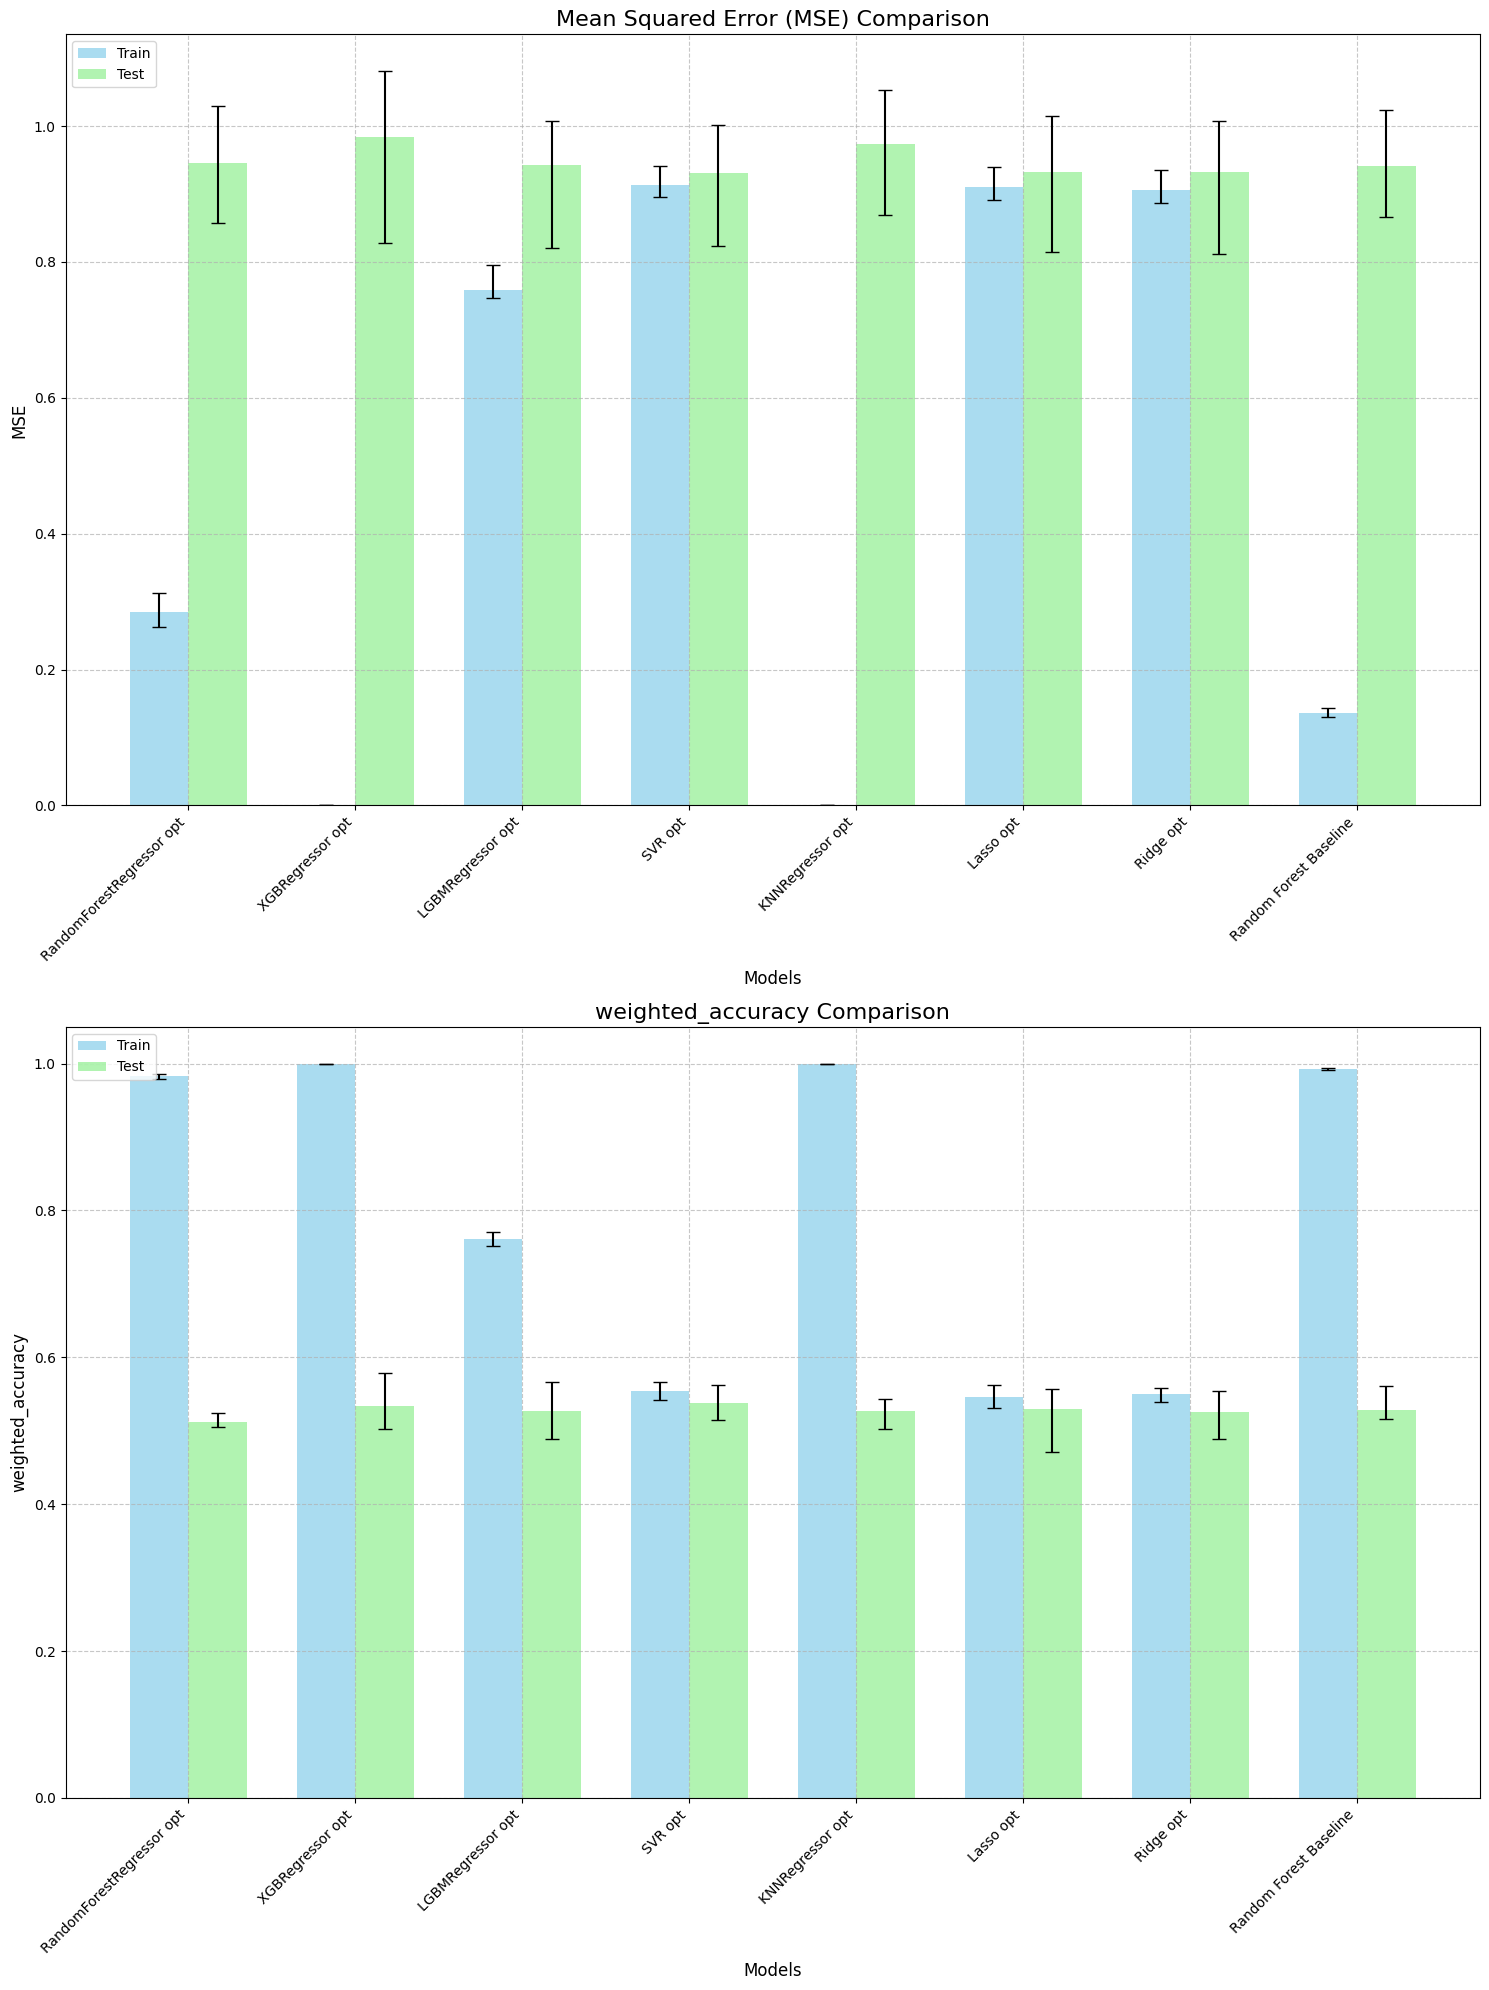

In [124]:
plot_multi_model_results(results_2_)

##### Bagging

In [125]:
top_models = sorted(models_opt_2.items(), key=lambda x: x[1]["best_score_"], reverse=True)
top_2_regressors = [(name, opt["estimator"]) for name, opt in top_models if isinstance(opt["estimator"], RegressorMixin)][:2]

print("Top 2 regressors used in VotingRegressor:")
for name, estimator in top_2_regressors:
    print(f"{name}: {type(estimator).__name__}")

# 定义 VotingRegressor 集成模型
voting_regressor_ensemble = VotingRegressor(estimators=top_2_regressors)

# 定义 BaggingRegressor 集成模型
bagging_ensemble = BaggingRegressor(
    estimator=RandomForestRegressor(),
    n_estimators=10,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1
)

# 定义包含回归模型的模型字典
models_3_ = {
    'bagging_ensemble': bagging_ensemble,
    'voting_regressor_ensemble': voting_regressor_ensemble,
    'Random Forest Baseline': RandomForestRegressor(),
}

Top 2 regressors used in VotingRegressor:
SVR: SVR
RandomForestRegressor: RandomForestRegressor


In [126]:
# Run cross-validation for regression models
results_3_ = run_multi_model_cv(X, y, models_3_)

Best mean w_acc test score: 0.5235 by model: bagging_ensemble
Min w_acc test score: 0.4973, Max w_acc test score: 0.5592


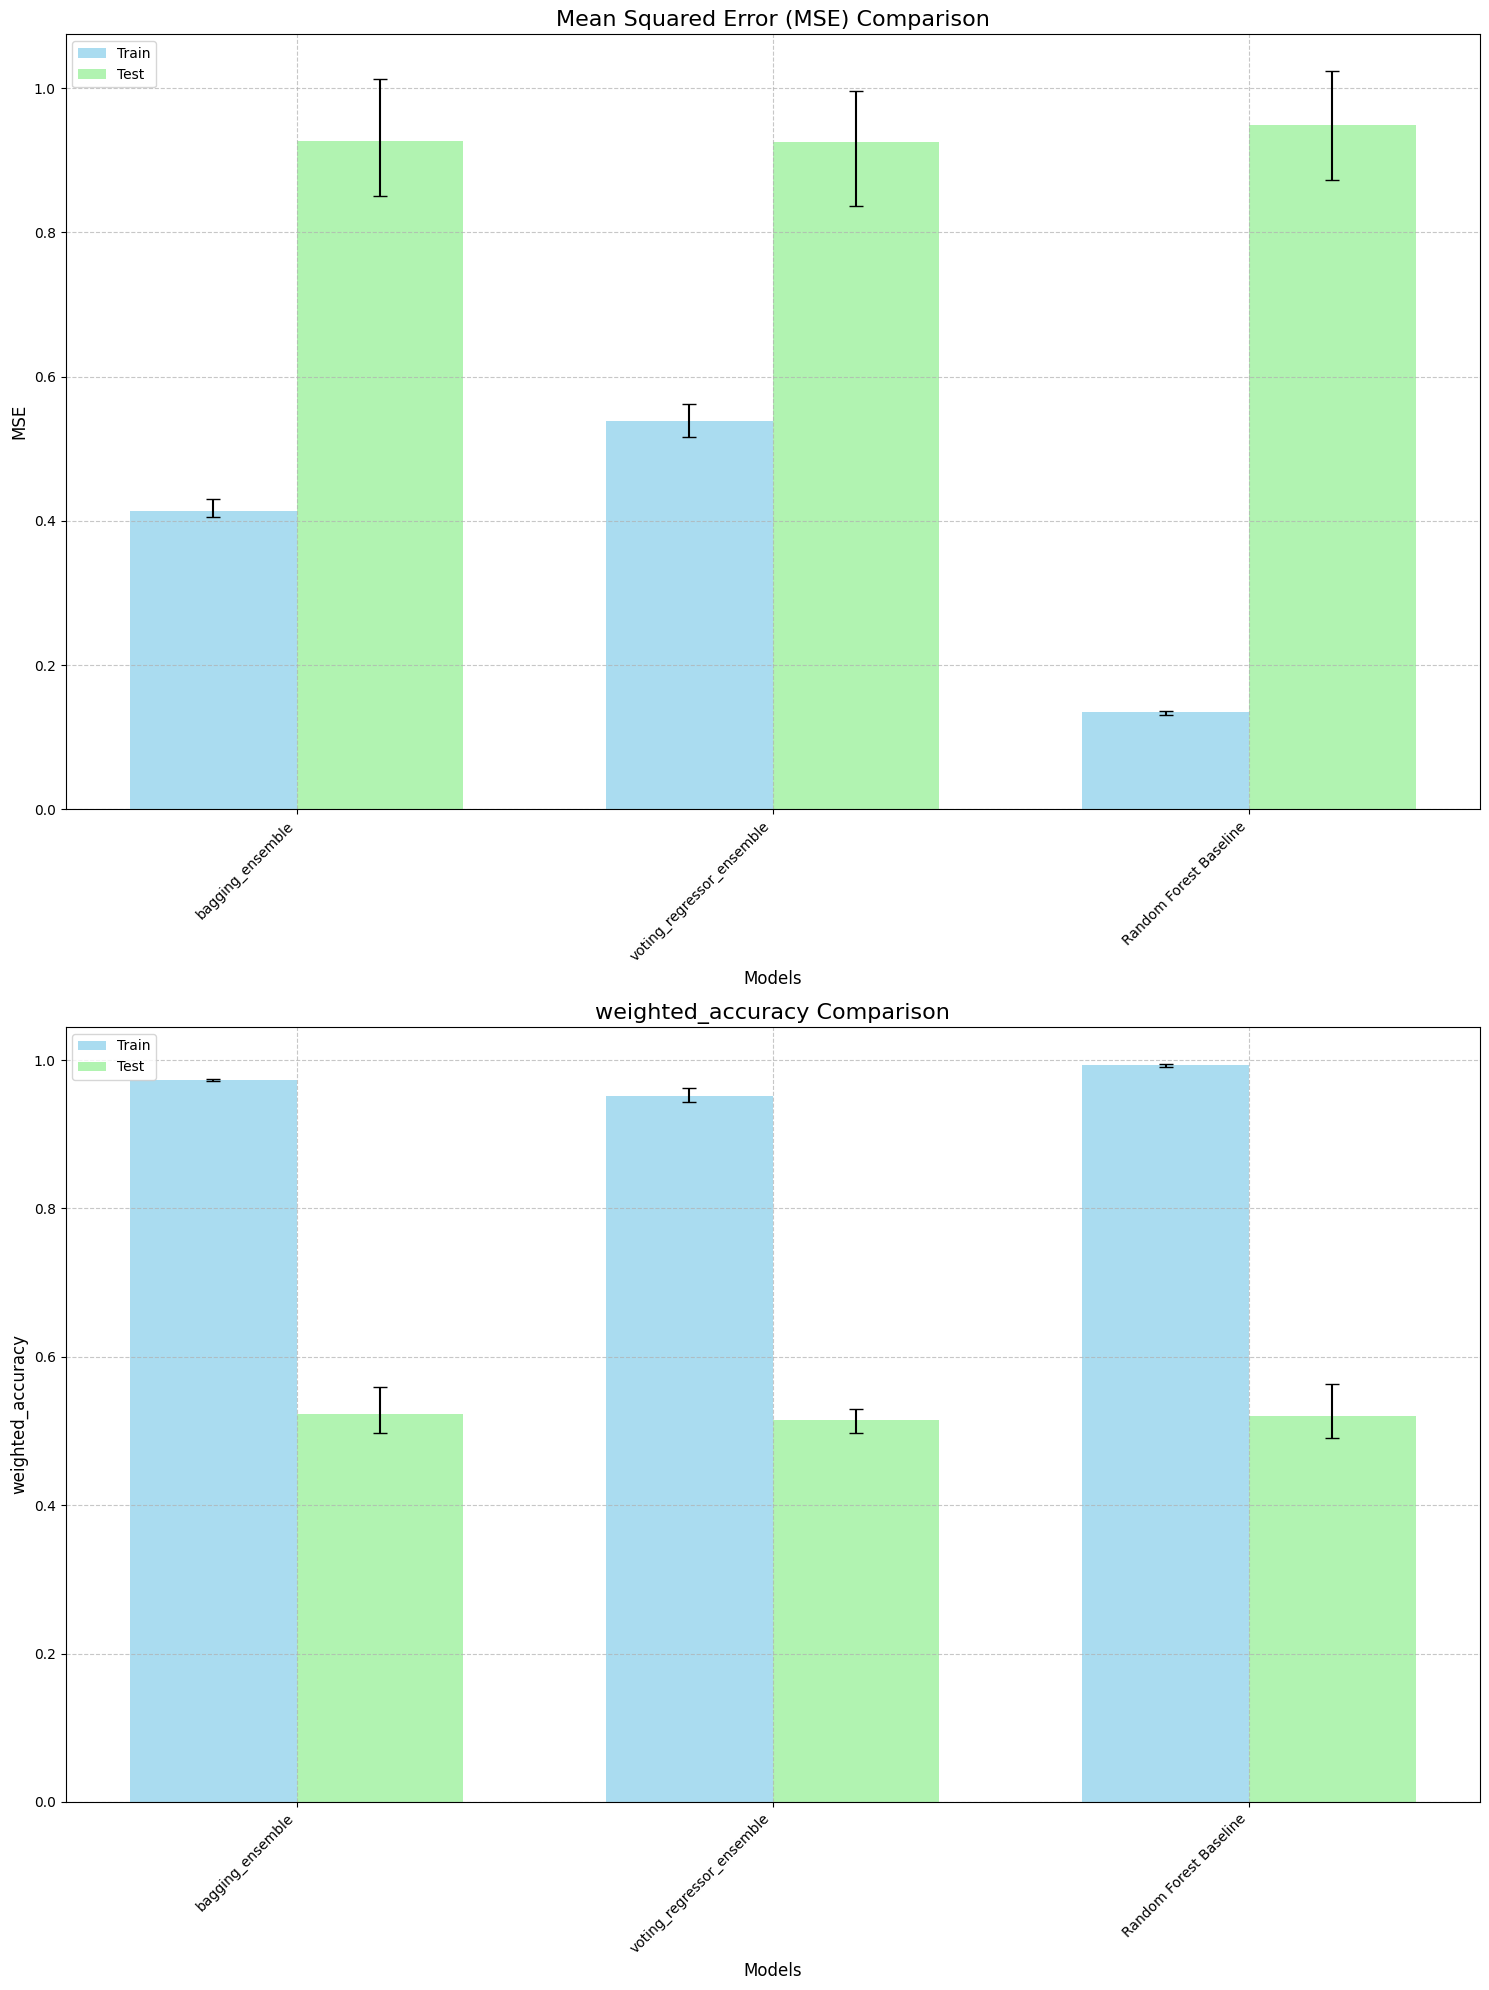

In [127]:
# Plot MSE results for regression models
plot_multi_model_results(results_3_)

##### Stacking

In [128]:
regressor_estimators = [
    (name, opt["estimator"]) for name, opt in models_opt_2.items() 
    if isinstance(opt["estimator"], RegressorMixin)
]
regressor_estimators = [
    (name, estimator) for name, estimator in regressor_estimators 
    if name in ['RandomForestRegressor', 'SVR', 'Lasso', 'XGBRegressor']
]

# Define the meta-models
ridge_regressor = Ridge()
random_forest_regressor = RandomForestRegressor()

# Stacking Regressor with Ridge as meta-model
stacking_regressor_ridge = StackingRegressor(
    estimators=regressor_estimators,
    final_estimator=ridge_regressor
)

# Stacking Regressor with RandomForest as meta-model
stacking_regressor_rf = StackingRegressor(
    estimators=regressor_estimators,
    final_estimator=random_forest_regressor
)

# Optional: Define a dictionary to hold the stacking models
models_4_ = {
    'stacking_regressor_ridge': stacking_regressor_ridge,
    'stacking_regressor_rf': stacking_regressor_rf
}

# Verify models
for name, model in models_4_.items():
    print(f"{name}: {model}")

stacking_regressor_ridge: StackingRegressor(estimators=[('RandomForestRegressor',
                               RandomForestRegressor(max_depth=29,
                                                     min_samples_split=5,
                                                     n_estimators=86)),
                              ('XGBRegressor',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8346448781876539,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                            max_delta_st

Best mean w_acc test score: 0.5144 by model: Stacking Regressor (Ridge Meta)
Min w_acc test score: 0.4756, Max w_acc test score: 0.5618


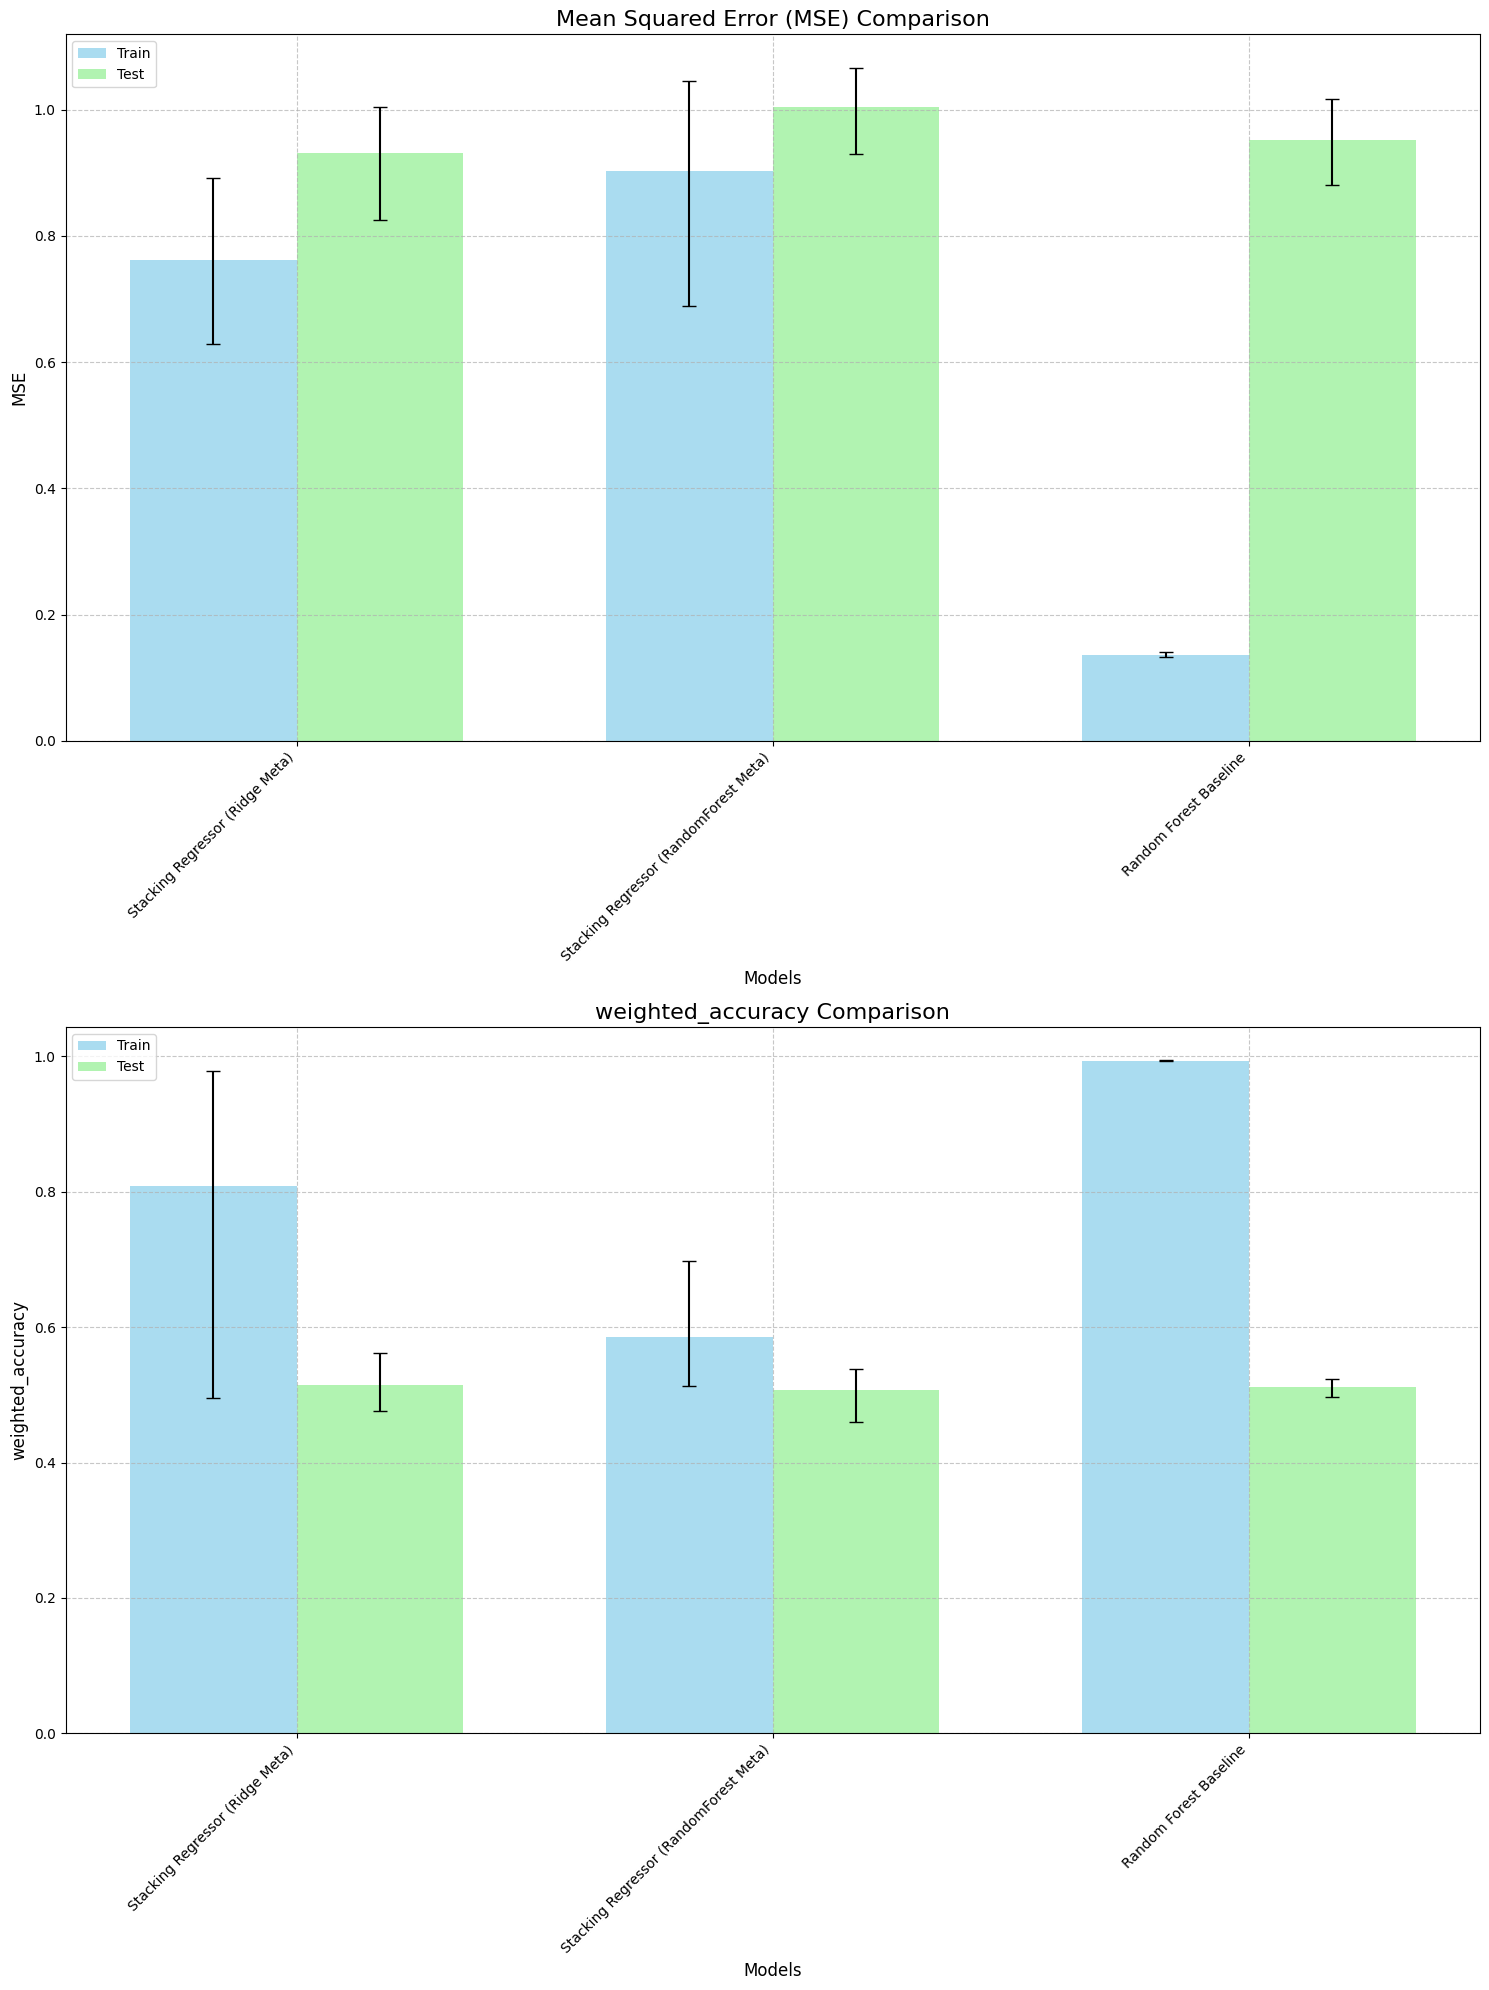

In [129]:
models_5_ = {
    'Stacking Regressor (Ridge Meta)': stacking_regressor_ridge,
    'Stacking Regressor (RandomForest Meta)': stacking_regressor_rf,
    'Random Forest Baseline': RandomForestRegressor(),
}

results_5 = run_multi_model_cv(X, y, models_5_)

plot_multi_model_results(results_5)

### Submission:

In [134]:
data_train = pd.read_csv('module6_exercise_train.csv', index_col='index')
X_test = pd.read_csv('module6_exercise_test.csv', index_col='index')
y_train = data_train.pop('end_of_day_return')
X_train = data_train.copy()

In [ ]:
# X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # 定义 SVR 模型及其参数
# svr_params = {
#     'C': 9.97811475103633,
#     'epsilon': 0.0013486889143963922,
#     'kernel': 'linear'
# }

# # 初始化 SVR 模型
# svr_model = SVR(**svr_params)

# # 训练模型
# svr_model.fit(X_train_train, y_train_train)

# # 预测
# y_pred = svr_model.predict(X_train_test)

# # 计算评估指标
# mse = mean_squared_error(y_train_test, y_pred)
# rmse = np.sqrt(mse)

# # 输出结果
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 1.0960789473948154
Mean Squared Error (MSE): 1.0960789473948154
Root Mean Squared Error (RMSE): 1.0469378908965017


In [131]:
bagging_ensemble = BaggingRegressor(
    estimator=RandomForestRegressor(),
    n_estimators=10,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1
)
y_pred = bagging_ensemble.fit(X_train, y_train).predict(X_test)

In [ ]:
submission = pd.DataFrame({
    'index': X_test.index,
    'end_of_day_return':y_pred 
})

submission.to_csv('submission.csv', index=False, sep=',')